In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import os
# Load processed review data with sentiment and themes
sentiment_path = "../outputs/sentiment/reviews_with_sentiment.csv"
theme_path = "../outputs/themes/theme_summary_per_bank.csv"
reviews_df = pd.read_csv(sentiment_path)
theme_df = pd.read_csv(theme_path)

In [ ]:
# 1. INSIGHTS GENERATION 
# Group by bank and theme
theme_summary = theme_df.groupby(['bank', 'theme_name'])['count'].sum().reset_index()

In [4]:
# Print top pain points and drivers
print("Top Drivers and Pain Points:")
print(theme_summary.sort_values('count', ascending=False).groupby('bank').head(3))


Top Drivers and Pain Points:
                          bank        theme_name  count
1            Bank of Abyssinia             Other    271
7                  Dashen Bank             Other    168
3  Commercial Bank of Ethiopia             Other    158
4  Commercial Bank of Ethiopia   Update Problems     53
9                  Dashen Bank   Update Problems     50
6                  Dashen Bank      Login Issues     49
0            Bank of Abyssinia  Feature Requests     26
2  Commercial Bank of Ethiopia     App Usability     20


In [ ]:
# 2. VISUALIZATIONS 
plot_dir = "../outputs/visuals"
os.makedirs(plot_dir, exist_ok=True)


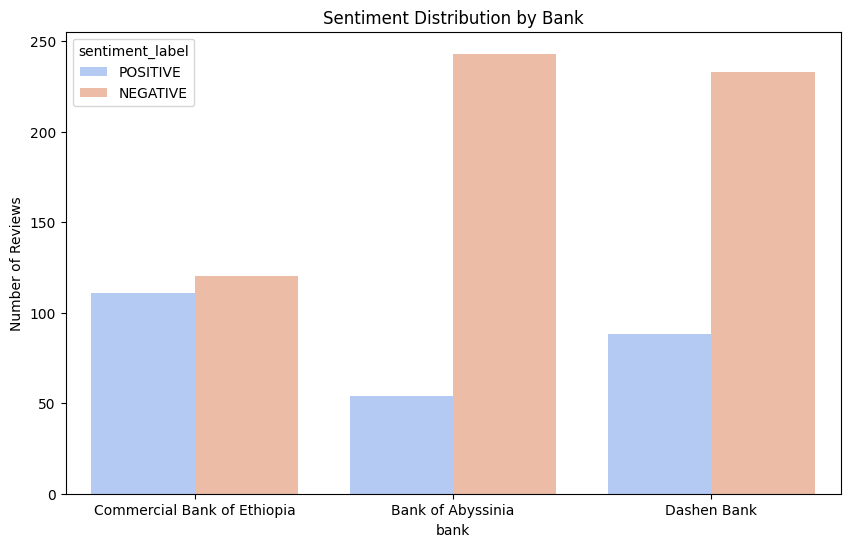

In [6]:
# a. Sentiment Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=reviews_df, x='bank', hue='sentiment_label', palette='coolwarm')
plt.title('Sentiment Distribution by Bank')
plt.ylabel('Number of Reviews')
plt.savefig(f"{plot_dir}/sentiment_distribution.png")
plt.show()


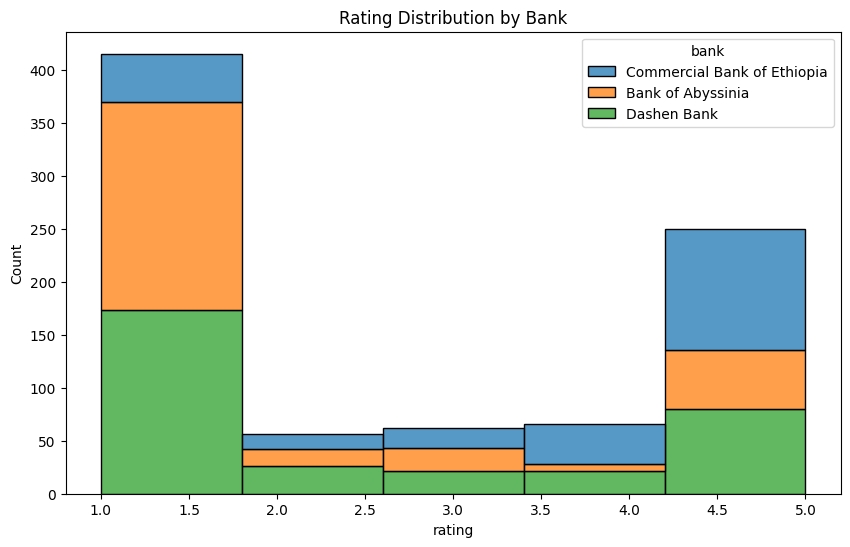

In [ ]:
# b. Rating Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=reviews_df, x='rating', hue='bank', multiple='stack', bins=5)
plt.title('Rating Distribution by Bank')
plt.savefig(f"{plot_dir}/rating_distribution.png")
plt.show()

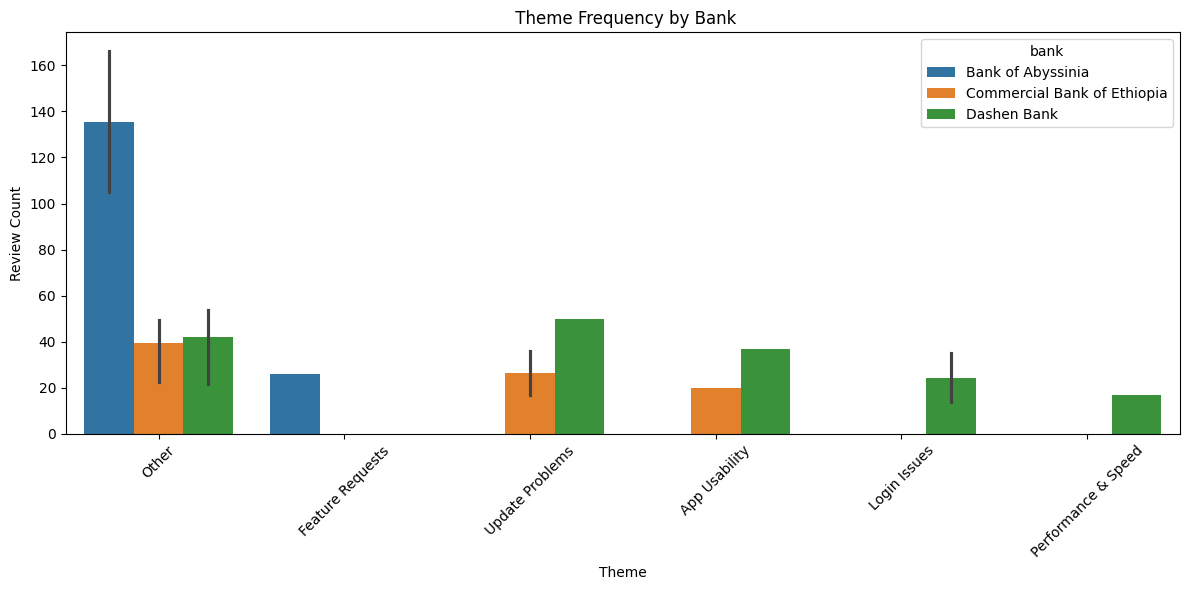

In [22]:
# c. Theme Frequency Bar Chart
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load theme mapping result
themes_df = pd.read_csv("../outputs/themes/theme_summary_per_bank.csv")

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=themes_df, x='theme_name', y='count', hue='bank')
plt.xticks(rotation=45)
plt.title(" Theme Frequency by Bank")
plt.ylabel("Review Count")
plt.xlabel("Theme")
plt.tight_layout()
plt.show()

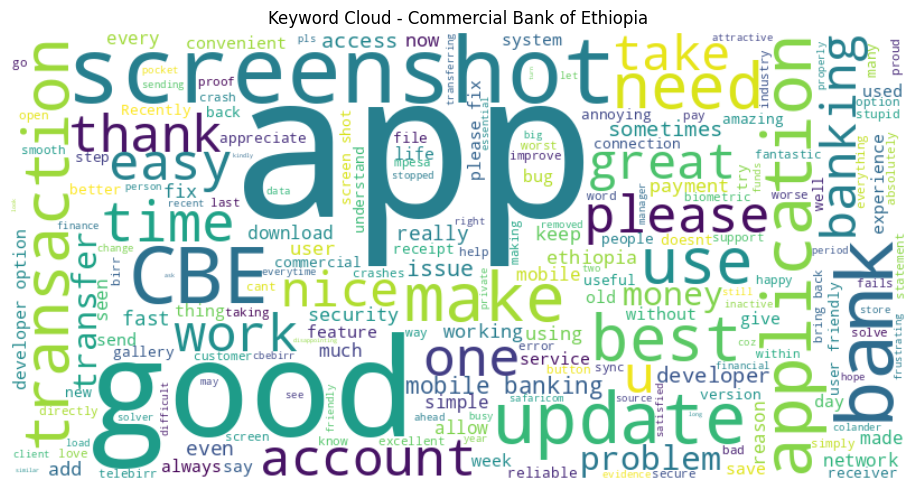

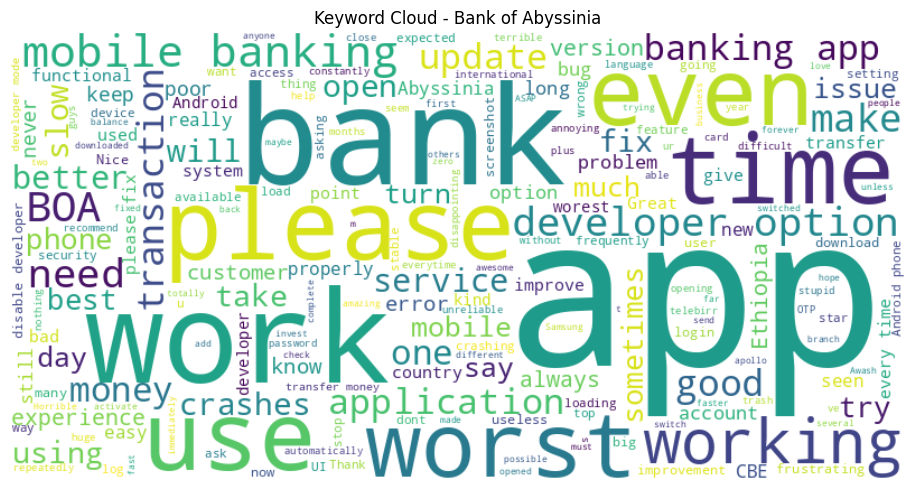

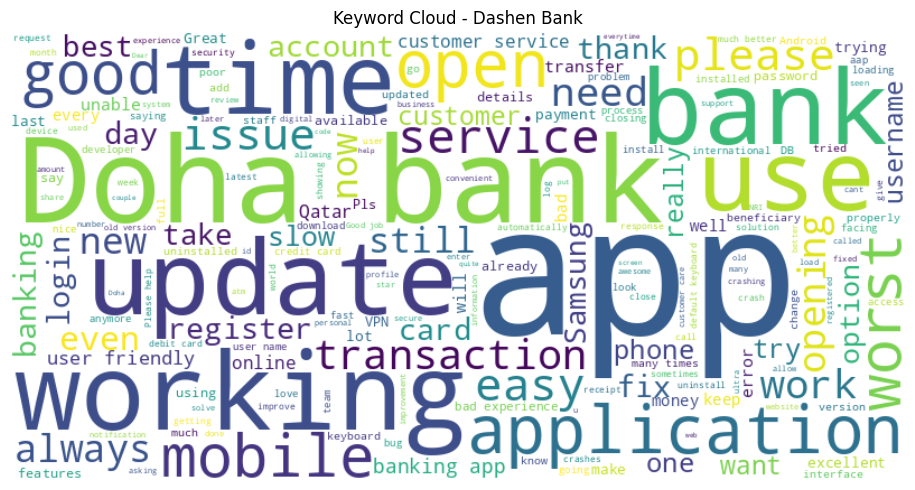

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

def generate_wordcloud(text, bank_name):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Keyword Cloud - {bank_name}")
    plt.tight_layout()
    plt.savefig(f"{plot_dir}/wordcloud_{bank_name.lower().replace(' ', '_')}.png")
    plt.show()

for bank in reviews_df['bank'].unique():
    text = " ".join(reviews_df[reviews_df['bank'] == bank]['review'].astype(str))
    generate_wordcloud(text, bank)


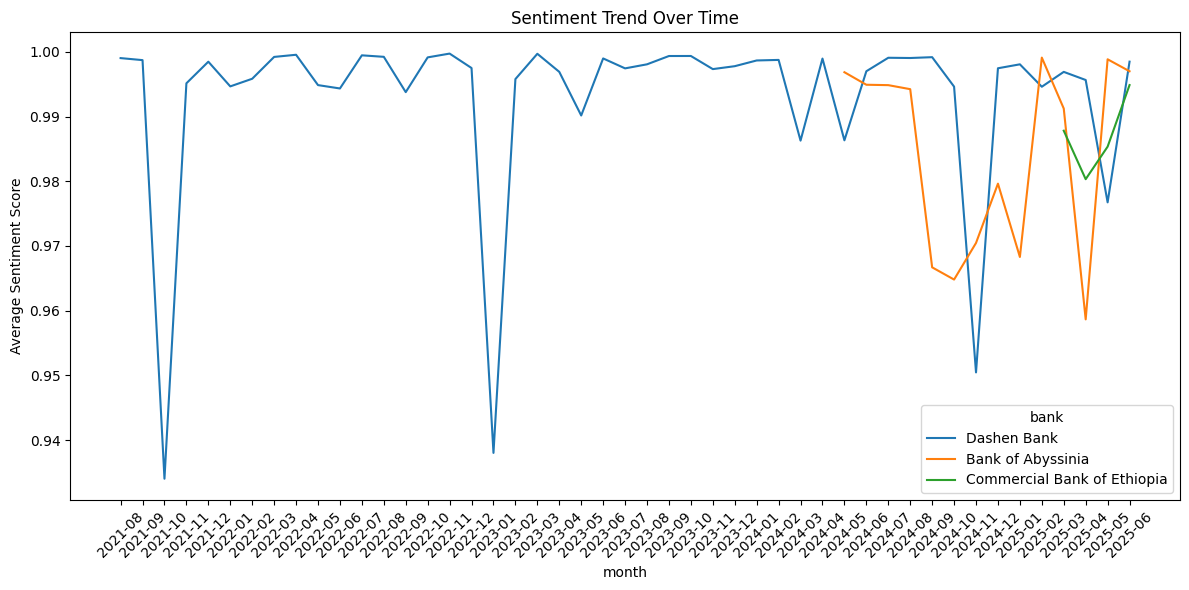

In [ ]:
# sentiment Score Trend Over Time
#  Ensure sentiment_score is numeric
reviews_df["sentiment_score"] = pd.to_numeric(reviews_df["sentiment_score"], errors='coerce')

#  Extract month for trend analysis
reviews_df['month'] = pd.to_datetime(reviews_df['date'], errors='coerce').dt.to_period('M').astype(str)

#  Average sentiment score per month per bank
sentiment_over_time = reviews_df.groupby(['month', 'bank'])['sentiment_score'].mean().reset_index()

#  Plot trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=sentiment_over_time, x='month', y='sentiment_score', hue='bank')
plt.title('Sentiment Trend Over Time')
plt.xticks(rotation=45)
plt.ylabel("Average Sentiment Score")
plt.tight_layout()
plt.savefig(f"{plot_dir}/.png")
plt.show()



In [ ]:
#  3. ETHICS COMMENT 
print("\n Ethical Concerns:")

print("- User reviews are self-reported and may contain bias (e.g., users tend to review after negative experiences).")
print("- Lack of Amharic reviews limits demographic inclusivity.")
print("- Some banks receive disproportionately more reviews, skewing aggregate analysis.")
print("- No verification of fake/spam reviews applied yet.")

print("\n Task 4 completed: insights, visualizations, and ethical summary generated.")


 Ethical Concerns:
- User reviews are self-reported and may contain bias (e.g., users tend to review after negative experiences).
- Lack of Amharic reviews limits demographic inclusivity.
- Some banks receive disproportionately more reviews, skewing aggregate analysis.
- No verification of fake/spam reviews applied yet.

 Task 4 completed: insights, visualizations, and ethical summary generated.


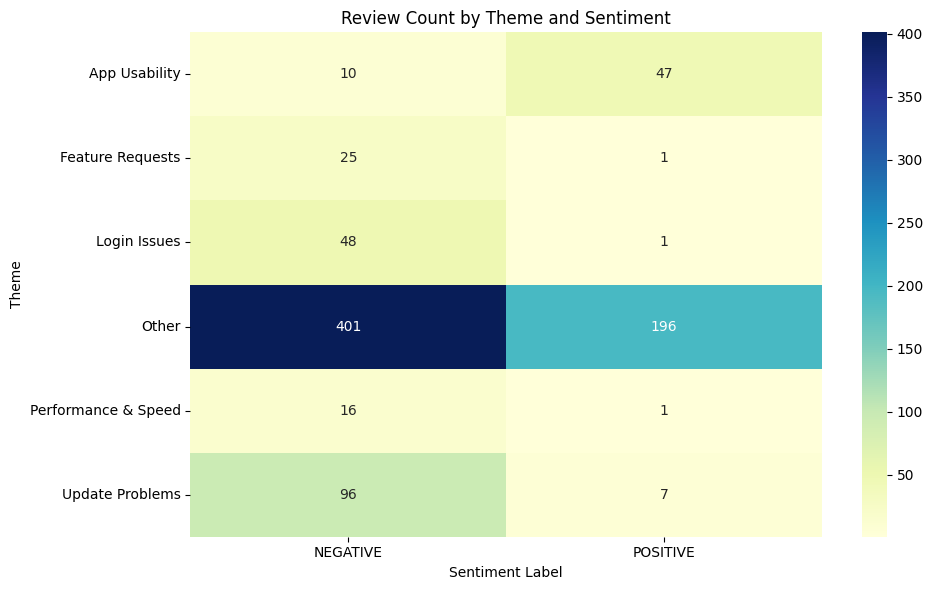

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load reviews with theme and sentiment label
df = pd.read_csv("../outputs/themes/reviews_with_themes.csv")

# Optional: Clean any unexpected or missing values
df = df.dropna(subset=["theme_name", "sentiment_label"])

# Group by theme and sentiment label
theme_sentiment_count = df.groupby(["theme_name", "sentiment_label"]).size().unstack(fill_value=0)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(theme_sentiment_count, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Review Count by Theme and Sentiment")
plt.xlabel("Sentiment Label")
plt.ylabel("Theme")
plt.tight_layout()
plt.show()
